In [2]:
import pandas as pd
pd.__version__

'1.4.2'

In [3]:
energy_df = pd.read_csv("Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv")
energy_df

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,20487.73,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,12287.32,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North


In [4]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

In [5]:
print("The number of different companies that are represented in this data set is: ", len(energy_df["Company Name"].unique()))

The number of different companies that are represented in this data set is:  439


In [6]:
print("The total number of jobs created for businesses in Queens is: ", energy_df[energy_df["City"] == "Queens"]["Job created"].sum())

The total number of jobs created for businesses in Queens is:  90.0


In [7]:
energy_df["email_domains"] = energy_df["company email"].str.split("@").str.get(1)
print("The number of different unique email domains names in the data set is: ", len(energy_df["email_domains"].dropna().unique()))

The number of different unique email domains names in the data set is:  356


In [8]:
energy_nta = energy_df[["NTA", "Company Name"]].groupby("NTA").count() >= 5
energy_nta

,Company Name
NTA,
Astoria,False
Baisley Park,False
Battery Park City-Lower Manhattan,True
Bedford,False
Bensonhurst West,False
...,...
Whitestone,False
Williamsburg,False
Windsor Terrace,False


In [9]:
energy_df_extra = pd.merge(energy_df, energy_nta, how="left", on="NTA")
energy_nta5 = energy_df_extra[energy_df_extra["Company Name_y"] == True]
energy_nta5

,Company Name_x,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,email_domains,Company Name_y
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy,NaN,True
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan,NaN,True
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West,industrycity.com,True
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan,silvprop.com,True
5,"120 Wall Street, LLC",Jason McCalla,jmccalla@silvprop.com,2125517391,120 Wall Street,New York,NY,10005,Commercial,Back Offices,...,40.704380,-74.006427,101.0,1.0,7.0,1000871.0,1.000370e+09,Battery Park City-Lower Manhattan,silvprop.com,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,"William Hird & Co., Inc.",Thomas E. Bury,tebury@hirdco.com,7184994881,255 40th Street,Brooklyn,NY,11232,Manufacturing,Manufacture fire protection systems,...,40.653997,-74.009925,307.0,38.0,2.0,3010468.0,3.007070e+09,Sunset Park West,hirdco.com,True
444,"Williams Sonoma, Inc.",Christine Hickman,CHickman@WSGC.com,7187804442,55 Water Street,Brooklyn,NY,11201,Wholesale/Warehouse/Distribution,high quality products for the home,...,40.703301,-73.992047,302.0,33.0,21.0,3000019.0,3.000260e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,WSGC.com,True
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South,wontonfood.com,True
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South,gmail.com,True


In [10]:
energy_avgsavings = energy_nta5[["NTA", "Total Savings"]].groupby("NTA").mean()
energy_avgsavings.head()

,Total Savings
NTA,
Battery Park City-Lower Manhattan,469890.796667
Bushwick South,26140.455000
Carroll Gardens-Columbia Street-Red Hook,24337.390000
College Point,17159.372857
Crown Heights North,4036.298889


In [11]:
energy_totaljobs = energy_nta5[["NTA", "Job created"]].groupby("NTA").sum()
energy_totaljobs.head()

,Job created
NTA,
Battery Park City-Lower Manhattan,0.0
Bushwick South,10.0
Carroll Gardens-Columbia Street-Red Hook,0.0
College Point,2.0
Crown Heights North,0.0


In [12]:
energy_avgsavings_totaljobs = pd.merge(energy_avgsavings, energy_totaljobs, how="left", on="NTA")
energy_avgsavings_totaljobs

,Total Savings,Job created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0
Greenpoint,9753.649286,0.0


In [13]:
energy_avgsavings_totaljobs.to_csv("avg_tot_savings_and_tot_jobs_for_NTA_5bus.csv")

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

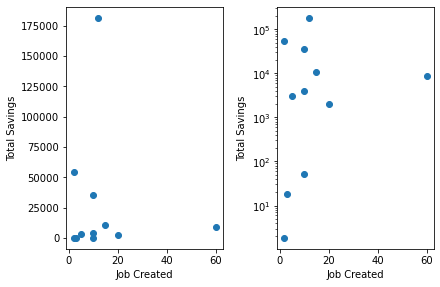

In [15]:
jobs_created = energy_df["Job created"]
total_savings = energy_df["Total Savings"]


plt.figure()
plt.subplot(121)
plt.scatter(jobs_created, total_savings)
plt.xlabel("Job Created")
plt.ylabel("Total Savings")
plt.subplot(122)
plt.scatter(jobs_created, total_savings)
plt.xlabel("Job Created")
plt.ylabel("Total Savings")
plt.yscale("log")
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

In [16]:
import numpy as np

log_total_savings = np.log(total_savings[total_savings > 0])

log_total_savings.replace([np.inf, -np.inf], np.nan, inplace = True)
log_total_savings.dropna(inplace=True)

log_total_savings.head()



1    11.824653
2    12.621354
3     7.677711
4    13.734742
5    12.817470
Name: Total Savings, dtype: float64

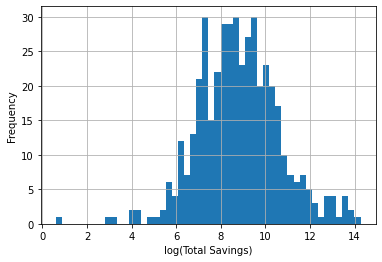

In [17]:
n, bins, patches = plt.hist(log_total_savings, 50)


plt.xlabel('log(Total Savings)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

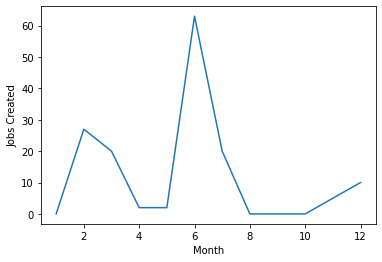

In [18]:
energy_df["Effective Date"] = pd.to_datetime(energy_df["Effective Date"])
#energy_df[["Effective Date", "Job created"]].dropna()
energy_df["month"] = energy_df["Effective Date"].dt.month
energy_month_job = energy_df[["month", "Job created"]].groupby("month").sum()

plt.plot(energy_month_job)
plt.xlabel("Month")
plt.ylabel("Jobs Created")
plt.show()